In [1]:
using OptimTestProblems
@show keys(OptimTestProblems.UnconstrainedProblems.examples)
using Plots
ezcontour(x, y, f) = begin
    X = repeat(x', length(y), 1)
    Y = repeat(y, 1, length(x))
    # Evaluate each f(x, y)
    Z = map((x,y) -> (f([x,y])), X, Y)
    plot(x, y, Z, st=:contour)
end

keys(OptimTestProblems.UnconstrainedProblems.examples) = AbstractString["Rosenbrock", "Quadratic Diagonal", "Hosaki", "Large Polynomial", "Penalty Function I", "Beale", "Extended Rosenbrock", "Polynomial", "Powell", "Exponential", "Paraboloid Diagonal", "Paraboloid Random Matrix", "Extended Powell", "Trigonometric", "Fletcher-Powell", "Parabola", "Himmelblau"]


ezcontour (generic function with 1 method)

mcmc!(f, [0.0; 1.0], 0.015, hist) = (5.282791668399755e-6, [0.9986776294861248, 0.997545000398983])


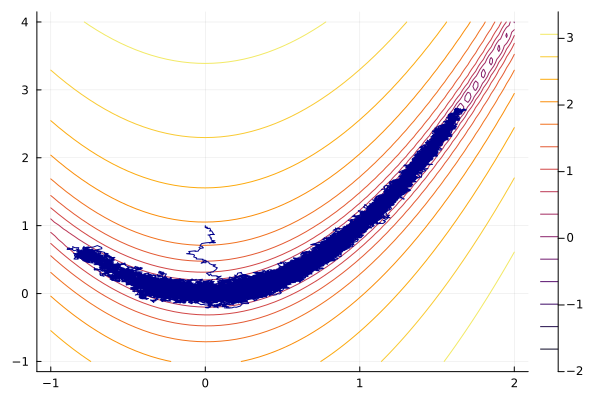

In [11]:
""" Run a Markov Chain Monte Carlo scheme to sample from
a distribution that minimizes a function f

mcmc!(f, x0, tau, hist) -> save the history in hist, which determins niter
mcmc(f, x0, tau, niter) -> return the best point
"""
function mcmc(f::Function, x0::Vector, tau::Real, niter::Int)
    mcmc!(f,x0,tau,niter,zeros(0,0))
end

function mcmc!(f::Function, x0::Vector, tau::Real, hist::Matrix) 
    mcmc!(f, x0, tau, size(hist,2)-1, hist)
end

function mcmc!(f::Function, x0::Vector, tau::Real, niter::Int, hist::Matrix)
    if !isempty(hist)
        @assert niter == size(hist,2)-1
        @assert length(x0) == size(hist,1)-1
    end
    
    n = length(x0)
    
    bestx = x0
    bestf = f(x0)
    if !isempty(hist)
        # save the point
        hist[:,1] = [bestf;x0]
    end
    
    curf = bestf
    x = bestx
    
    for iter=1:niter
        xn = x + tau*randn(n)
        nextf = f(xn)
        a = exp(-nextf)/exp(-curf)
        if a > 1 || rand() <= a
            x = xn
            curf = nextf
        end
        
        if curf < bestf
            bestx = x
            bestf = curf
        end
            
        if !isempty(hist)
            # save the point
            hist[:,iter+1] = [curf; x]
        end
    end
    
    return bestf, bestx
end

f = OptimTestProblems.UnconstrainedProblems.examples["Rosenbrock"].f
hist = zeros(3,100000)
@show mcmc!(f, [0.0;1.0], 0.015, hist)
ezcontour(-1:0.05:2, -1:0.05:4, x -> (log10(f(x)+0.01)))
plot!(hist[2,:],hist[3,:],label="",color="darkblue")

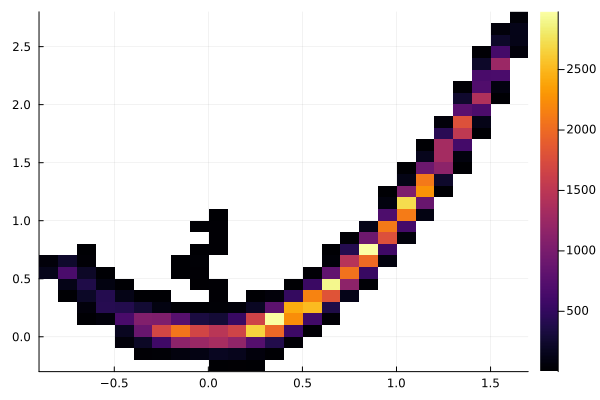

In [12]:
histogram2d(hist[2,:], hist[3,:], bins=30)

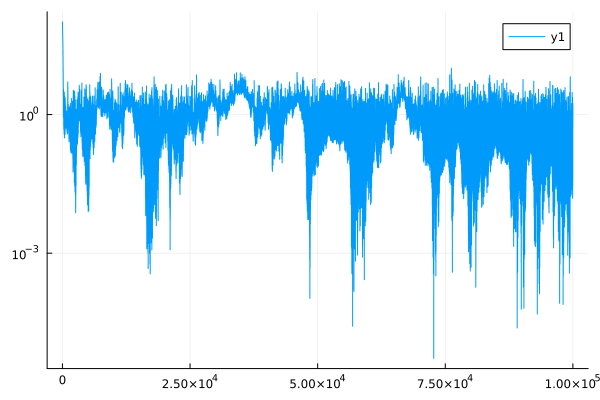

In [13]:
plot(hist[1,:], yscale=:log10)

anneal!(f, [0.0; 1.0], 0.01, [range(Tmax, stop = 0, length = N0); zeros(N1)], hist) = (1.5666435125579366e-6, [0.9987562047948968, 0.9975279626865328])


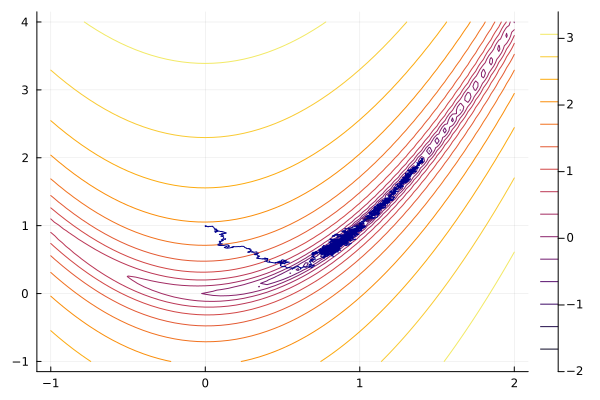

In [14]:
""" Run a Markov Chain Monte Carlo scheme to sample from
a distribution that minimizes a function f

mcmc!(f, x0, tau, hist) -> save the history in hist, which determins niter
mcmc(f, x0, tau, niter) -> return the best point
"""
function anneal(f::Function, x0::Vector, tau::Real, tvals)
    anneal!(f,x0,tau,tvals,zeros(0,0))
end

function anneal!(f::Function, x0::Vector, tau::Real, tvals, hist::Matrix) 
    
    niter = length(tvals)

    if !isempty(hist)
        @assert niter == size(hist,2)-1
        @assert length(x0) == size(hist,1)-1
    end
    
    n = length(x0)
    
    bestx = x0
    bestf = f(x0)
    if !isempty(hist)
        # save the point
        hist[:,1] = [bestf;x0]
    end
    
    curf = bestf
    x = bestx
    
    for iter=1:niter
        xn = x + tau*randn(n)
        nextf = f(xn)
        
        a = exp((-nextf + curf)/tvals[iter]) 
        #@show a
        if a > 1 || rand() <= a
            x = xn
            curf = nextf
        end
        
        if curf < bestf
            bestx = x
            bestf = curf
        end
            
        if !isempty(hist)
            # save the point
            hist[:,iter+1] = [curf; x]
        end
    end
    
    return bestf, bestx
end

f = OptimTestProblems.UnconstrainedProblems.examples["Rosenbrock"].f
Tmax = 1
N0 = 5000
N1 = 5000
hist = zeros(3,N0+N1+1)
@show anneal!(f, [0.0;1.0], 0.01, [range(Tmax,stop=0,length=N0); zeros(N1)], hist)
ezcontour(-1:0.05:2, -1:0.05:4, x -> (log10(f(x)+0.01)))
plot!(hist[2,:],hist[3,:],label="",color="darkblue")

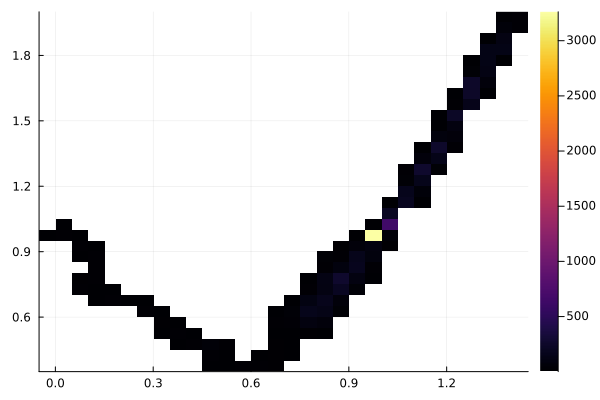

In [15]:
histogram2d(hist[2,:], hist[3,:], bins=30)

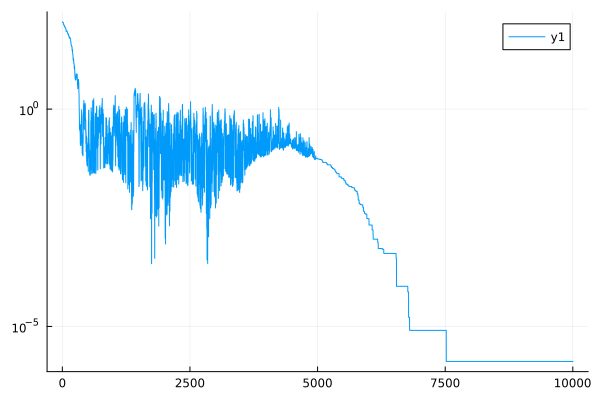

In [16]:
plot(hist[1,:], yscale=:log10)